In [1]:
import pandas as pd
import datetime as dt
import MetaTrader5 as mt5
import pytz
import numpy as np
from dateutil.relativedelta import relativedelta

%matplotlib inline
import string
import warnings
import matplotlib.dates as mdates
import datetime
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import matplotlib.ticker as mticker
import statsmodels.api as sm
import math
import seaborn as sns
import matplotlib.dates

from datetime import date
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.ticker import StrMethodFormatter
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm
from scipy import stats
from matplotlib import style

# Opções de Gráfico

plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='Times New Roman', size=15)
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'cm'
plt.rcParams['axes.grid'] = True
kw_save = dict(bbox_iches='tight', transparent=True)

timezone = pytz.timezone("Etc/UTC")

mt5.initialize()

tf_dict = {
    1: mt5.TIMEFRAME_M1,
    5: mt5.TIMEFRAME_M5,
    10: mt5.TIMEFRAME_M10,
    15: mt5.TIMEFRAME_M15,
    20: mt5.TIMEFRAME_M20,
    30: mt5.TIMEFRAME_M30,
    'H1': mt5.TIMEFRAME_H1,
    'H2': mt5.TIMEFRAME_H2,
    'H4': mt5.TIMEFRAME_H4,
    'D': mt5.TIMEFRAME_D1,
    'S': mt5.TIMEFRAME_W1, 
    'M': mt5.TIMEFRAME_MN1
}


def get_candles(ticker, tf, utc_end, n_months, months_step=3):
    dfs = []
    utc_date = utc_end
    months = 0
    
    months_step = months_step if tf != 1 else 1
    
    while True:
        step = months_step if n_months - months >= months_step else n_months - months
        
        df = pd.DataFrame(mt5.copy_rates_range(ticker, tf_dict[tf], utc_date-relativedelta(months=+step), utc_date))
        dfs.append(df)
        utc_date = utc_date-relativedelta(months=+step)
        
        months += step
        if months == n_months: break
        
    candles = pd.concat(dfs[::-1])
    candles['time']=pd.to_datetime(candles['time'], unit='s')
    del candles['spread']
    candles.columns = ['datetime', 'Open', 'High', 'Low', 'Close', 'Tick_Volume', 'Volume']
    candles = candles.set_index('datetime')
    candles = candles.rename_axis(ticker, axis=1)
    candles = candles.drop_duplicates()
    return candles

utc_to = dt.datetime(2021,1,4, tzinfo=timezone)

ModuleNotFoundError: No module named 'MetaTrader'

In [2]:
price = get_candles('CSNA3', 'D', utc_to, 36)

<AxesSubplot:>

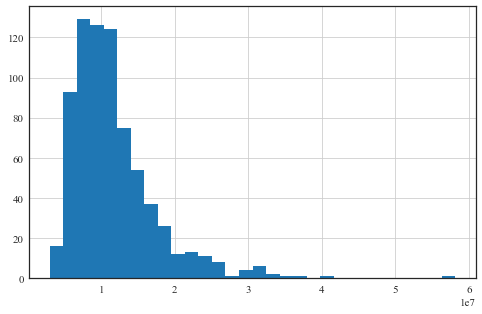

In [3]:
price['Volume'].hist(bins=30)

In [4]:
good_volumes = price[price['Volume'] > 30000000]

In [5]:
good_volumes

CSNA3,Open,High,Low,Close,Tick_Volume,Volume
datetime,,,,,,
2018-04-20,8.07,8.18,7.78,7.90,10433,32155700
2019-01-30,9.60,10.36,9.58,9.68,23233,58173500
2019-02-21,10.13,10.82,9.99,10.75,33841,33899700
2019-02-22,10.82,11.78,10.82,11.56,36940,30544700
2019-03-19,15.34,16.24,14.49,14.62,46700,34208000
2019-03-20,14.35,15.38,14.13,14.82,42254,31103400
2019-10-24,12.79,13.08,12.36,12.50,45585,31266200
2020-03-10,9.19,9.36,8.20,9.36,34940,32007900
2020-04-29,8.05,9.26,8.00,9.02,43628,34308900


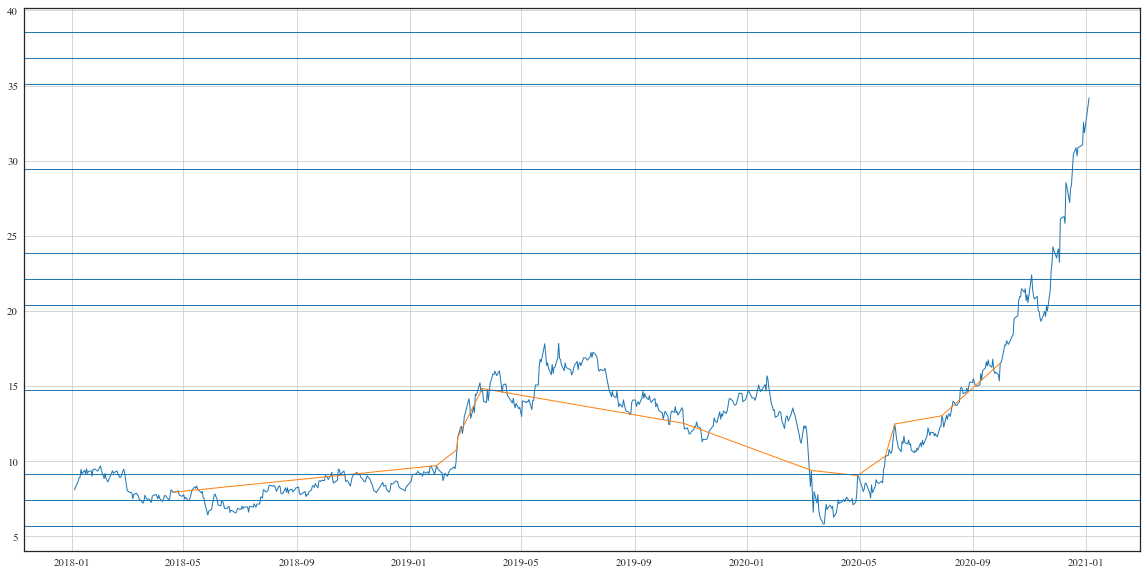

In [26]:
import matplotlib.transforms as transforms
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(price['Close'])
ax.plot(good_volumes['Close'])
ax.axhline(ponder_mean)
ax.axhline((ponder_mean*0.382))
ax.axhline((ponder_mean*0.5))
ax.axhline((ponder_mean*0.618))
ax.axhline((ponder_mean*1.382))
ax.axhline((ponder_mean*1.5))
ax.axhline((ponder_mean*1.618))
ax.axhline((ponder_mean*2))
ax.axhline((ponder_mean*2.382))
ax.axhline((ponder_mean*2.5))
ax.axhline((ponder_mean*2.618))

In [7]:
std = good_volumes['Close'].std()
std

2.552565577148024

In [8]:
mean = good_volumes['Close'].mean()
mean

11.729230769230771

In [9]:
ponder_mean = mean * (1 + (std/10))
ponder_mean

14.723193840027163

In [10]:
good_volumes['Close']

datetime
2018-04-20     7.90
2019-01-30     9.68
2019-02-21    10.75
2019-02-22    11.56
2019-03-19    14.62
2019-03-20    14.82
2019-10-24    12.50
2020-03-10     9.36
2020-04-29     9.02
2020-05-29    10.32
2020-06-08    12.45
2020-07-29    13.00
2020-09-30    16.50
Name: Close, dtype: float64

In [11]:
lenght = np.arange(1,len(price['Close']),1)
df_lenght = pd.DataFrame()
for i in range(len(price['Close'])):
    
# lenght

SyntaxError: unexpected EOF while parsing (<ipython-input-11-f21b02e34927>, line 5)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(price['Close'])
ax.plot(good_volumes['Close'])
ax.plo(ponder_mean, price['Close'])

In [6]:
MT5TimeFrame.Daily

<MT5TimeFrame.Daily: 1440>

In [7]:
from datetime import datetime
from pyomt5.api import MT5TimeFrame
from pyomt5.stock import StockPriceHistory

c = StockPriceHistory()

start_date = datetime(2019, 1, 1)
end_date = datetime(2019, 5, 2)
data = c.get_price_from(symbol='PETR4',
                        from_date=start_date,
                        to_date=end_date,
                        timeframe=MT5TimeFrame.Daily)

print(data)

start_date = datetime(2019, 1, 2, 10, 0)
end_date = datetime(2019, 1, 2, 12, 0, 0)
data = c.get_price_from(symbol='PETR4',
                        from_date=start_date,
                        to_date=end_date,
                        timeframe=MT5TimeFrame.Daily)

print(data)

DataNotFoundError: 